# Sentiment Analysis on Product Reviews.

Mounting drive for the colab notebook

In [1]:
#Mounting the drive for the colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.offline as py
import plotly.graph_objs as go
import warnings

# NLP modules
import nltk
import re 
import string
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob , Word
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS

In [3]:
color = sns.color_palette()
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
nltk.download("stopwords")
nltk.download("all")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!

True

## Understanding data

Load/Read the dataset

In [4]:
reviews_df=pd.read_csv('/content/drive/MyDrive/amazon_dataset/product.csv')
reviews_df.head(5)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


Shape of the dataframe

In [5]:
reviews_df.shape

(7299, 27)

There are 27 columns and a total of 7299 rows in this dataset. 

In [6]:
#Columns/attributes and their datatypes
reviews_df.dtypes

id                      object
asins                   object
brand                   object
categories              object
colors                  object
dateAdded               object
dateUpdated             object
dimension               object
ean                    float64
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
name                    object
primaryCategories       object
reviews.date            object
reviews.dateSeen        object
reviews.doRecommend     object
reviews.numHelpful     float64
reviews.rating         float64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
sourceURLs              object
upc                    float64
weight                  object
dtype: object

The columns reflect on different attributes that are useful in understanding the reviews on products. We mainly look at the brand manufacturers, recommendations, ratings, and  user reviews for different products sold on Amazon, Ebay, etc.

## Data Cleaning and preprocessing

In [7]:
reviews_df.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2019
dateAdded                 0
dateUpdated               0
dimension              1209
ean                    4348
imageURLs                 0
keys                      0
manufacturer           2667
manufacturerNumber        0
name                      0
primaryCategories         0
reviews.date             61
reviews.dateSeen          0
reviews.doRecommend    1391
reviews.numHelpful     1486
reviews.rating          164
reviews.sourceURLs        0
reviews.text              5
reviews.title             4
reviews.username          0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

We look at the null values in the data to drop them. The fields that are most used for sentiment classification in the data are user review in text and the rating of the product. All the null values are dropped.

In [8]:
reviews_df = reviews_df.dropna(subset=['reviews.text']) #dropping null reviews
reviews_df = reviews_df.dropna(subset=['reviews.rating']) #dropping null ratings

In [9]:
reviews_df.shape

(7130, 27)

Then we get rid of the duplicate values in the text. We match the text of the review, rating, username and the date when the review was posted to identify the duplicate values and drop them.

In [10]:
reviews_df.duplicated(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date']).sum()

14

In [11]:
reviews_df=reviews_df.drop_duplicates(subset=['reviews.text', 'reviews.username', 'reviews.rating', 'reviews.date'])

In [12]:
reviews_df.shape

(7116, 27)

After dropping null values and duplicate entries, there are now 7116 rows in the data.

We then convert our reviews to all lowercase text and remove the unnecessary string literals from the text for proper preprocessing. This is done to avoid having different representations of the same word in the vector space.
We remove the stopwords in order to remove the low level information from our text and give more focus to the important information.

In [13]:
reviews_df["reviews.text"] = (
    reviews_df["reviews.text"]
    .str.lower()
    .str.replace("[^\w\s]", "")
    .str.replace("\d+", "")
    .str.replace("\n", " ")
    .replace("\r", "")
    .str.replace("[^a-zA-Z0-9\s]", "")
)

In [14]:
def word_cleaner(data):
    words = [re.sub("[^a-zA-Z]", " ", i) for i in data]
    words = [i.lower() for j in words for i in j.split()] # Split all the sentences into words
    words = [i for i in words if not i in set(stopwords.words("english"))] # Split all the sentences into words
    return words

We identify the most common used words in the text to analyze them in product reviews and plot the frequency of these words. The words such as "great" and "remote" are used frequently in the reviews.

In [15]:
word_frequency = pd.DataFrame(
    nltk.FreqDist(word_cleaner(reviews_df["reviews.text"])).most_common(25),
    columns=["Frequent_Words", "Frequency"],
)

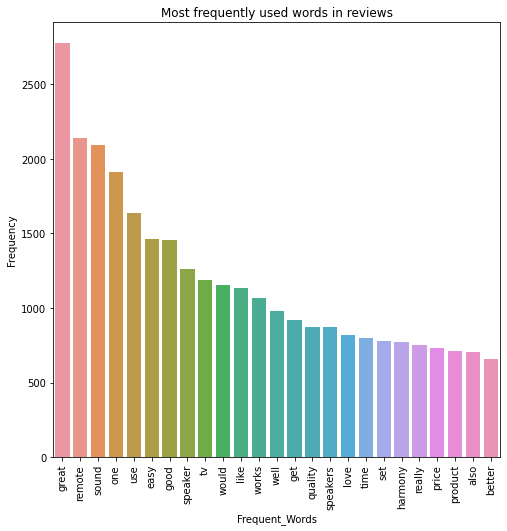

In [16]:
plt.figure(figsize=(8, 8))
plt.xticks(rotation=90)
plt.title("Most frequently used words in reviews")
sns.barplot(x="Frequent_Words", y="Frequency", data=word_frequency)

In [17]:
lemmatizer_output = WordNetLemmatizer()

reviews_df["reviews.text"] = reviews_df["reviews.text"].apply(
    lambda x: word_tokenize(x.lower())
)
reviews_df["reviews.text"] = reviews_df["reviews.text"].apply(
    lambda x: [word for word in x if word not in STOPWORDS]
)
reviews_df["reviews.text"] = reviews_df["reviews.text"].apply(
    lambda x: [lemmatizer_output.lemmatize(word) for word in x]
)
reviews_df["reviews.text"] = reviews_df["reviews.text"].apply(lambda x: " ".join(x))

In [18]:
reviews_df['reviews.text'].head(10)

0    keyboard easy type fingerprint reader best fea...
1                        thin light type pretty easily
2    love new design key spaced well mi type finger...
3    attached easily firmly nice feel must surface pro
4    original keyboard okay laptop feel bit floppy ...
5    purchased replace original surface pro keyboar...
6      find comfortable type rarely use fingerprint id
7    good keyboard addition surface pro platform de...
8    tough getting work surface pro worked bug love...
9    now quickly hassle free log surface finger pri...
Name: reviews.text, dtype: object

## Visualization

A word cloud can be considered as a snapshot of the text. It is useful in understanding the text at a glance.

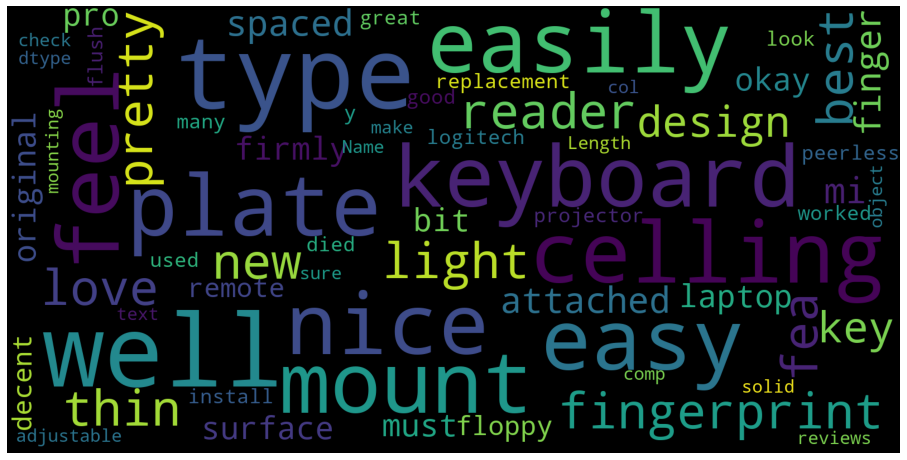

In [19]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=250,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(reviews_df["reviews.text"])


Plotting the frequency of ratings from 0 stars to 5 stars.

[Text(0.5, 1.0, 'Frequency of each rating')]

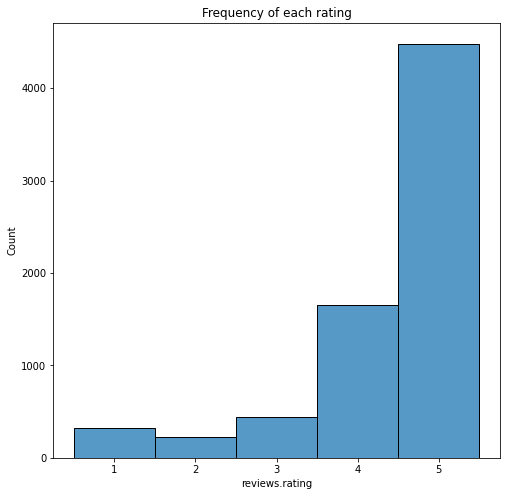

In [20]:
plt.figure(figsize=(8,8))
sns.histplot(data=reviews_df, x=reviews_df['reviews.rating'], discrete="True").set(title = "Frequency of each rating")

The distribution here is mostly positive (4 and 5 stars) and implies that the customers are happy with the products they purchase.

We also look at the reviews of each brand. When predicting the sentiment labels for customer satisfaction, this could be useful to understand the customer satisfaction for a particular brand.

In [21]:
#review by brand
reviews_df.groupby(reviews_df['brand']).mean()['reviews.rating']

brand
Alpine                    4.526923
Belkin                    3.875000
Bose                      4.600000
Bowers & Wilkins          4.766355
Boytone                   4.459459
CLARITY-TELECOM           4.909091
Corsair                   4.798246
Definitive Technology     4.851852
Dell                      4.500000
DreamWave                 3.500000
Glengery                  4.263158
House of Marley           4.500000
JBL                       4.370044
JVC                       4.604478
Kicker                    5.000000
Lenovo                    4.535714
Logitech                  3.992908
Lowepro                   4.625954
MEE audio                 4.412903
Microsoft                 4.606061
Midland                   4.659091
Motorola                  3.868421
Netgear                   4.570470
Peerless-AV               4.250000
Pny                       4.549738
Power Acoustik            4.750000
SVS                       5.000000
Samsung                   4.423445
Sanus         

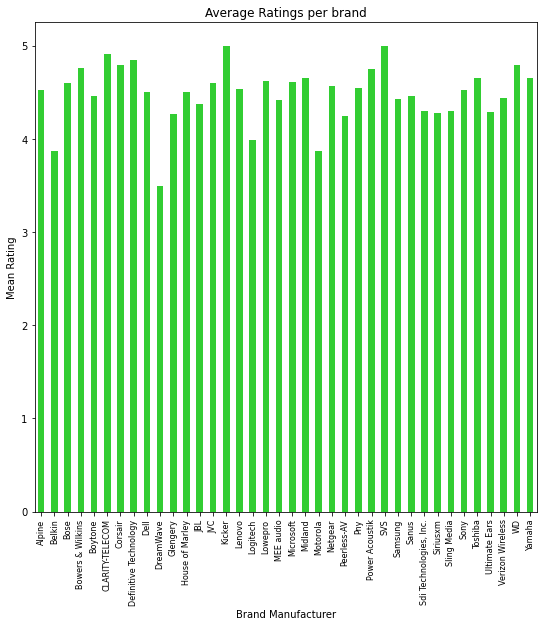

In [22]:
reviews_df = reviews_df.replace(np.nan, 0)
reviews_dfm = reviews_df.groupby(reviews_df["brand"]).mean()["reviews.rating"]
plt.title("Average Ratings per brand")
plt.xticks(fontsize=8)
reviews_dfm.plot(
    kind="bar",
    ylabel="Mean Rating",
    xlabel="Brand Manufacturer",
    figsize=(9, 9),
    color="limegreen",
)

To understand the data, we plot the graphs for length of text in reviews. The users tend to give little or no written review for low ratings. For high ratings, the average review length is about 60 to 80.

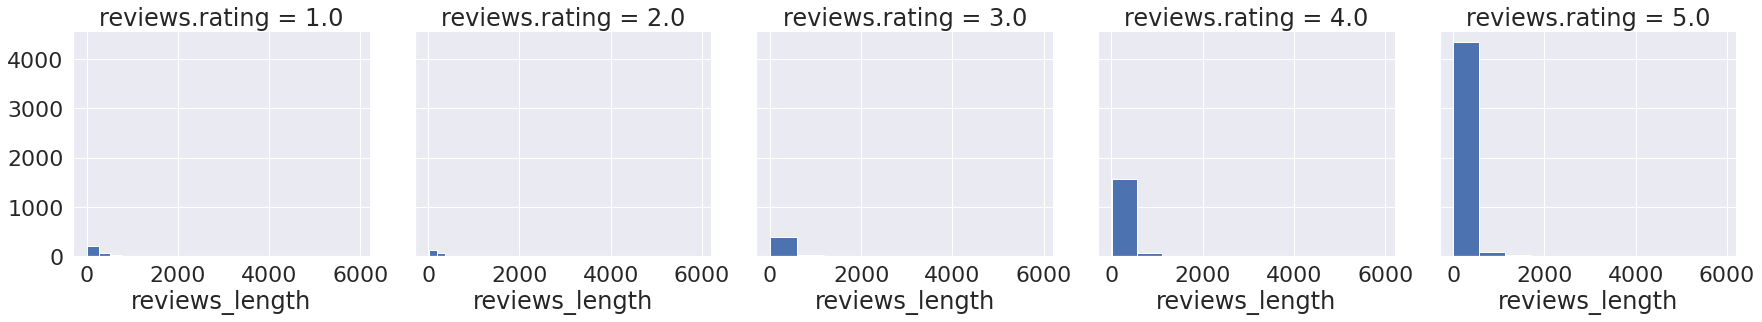

In [23]:
reviews_df["reviews_length"] = reviews_df["reviews.text"].apply(len)
sns.set(font_scale=2.0)

graph = sns.FacetGrid(reviews_df, col="reviews.rating", size=5)
graph.map(plt.hist, "reviews_length")

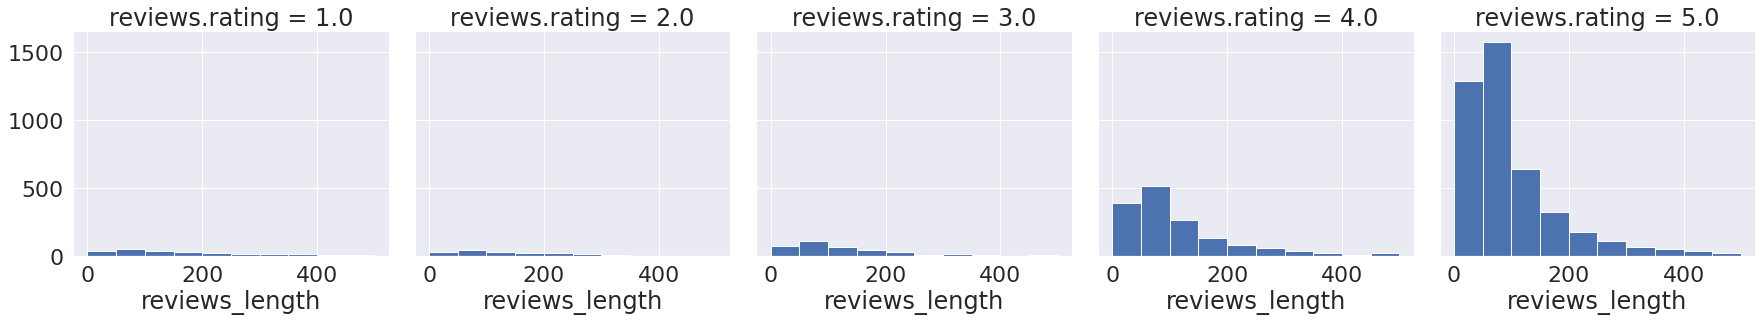

In [24]:
graph = sns.FacetGrid(reviews_df,col='reviews.rating',size=5)
graph.map(plt.hist,'reviews_length', range=[0, 500])

Product recommendation by the users or the e-commerce sites such as Amazon and Ebay also gives information about the customer satisfaction. From the pie plot that is shown below, the recommendations are fairly positive.

In [25]:
reviews_df['reviews.doRecommend'].fillna("N/A",inplace=True)

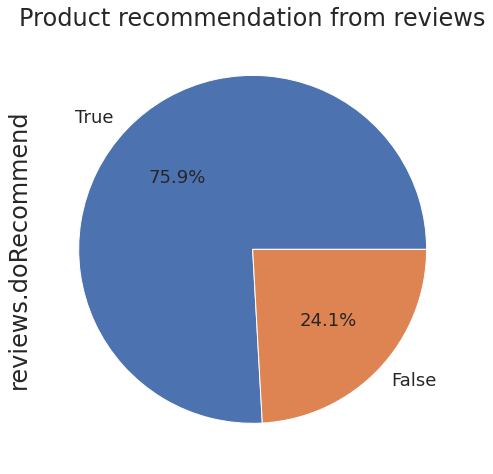

In [26]:
plt.figure(figsize = (8,8))
plt.title("Product recommendation from reviews")
reviews_df["reviews.doRecommend"].value_counts().plot.pie(autopct="%1.1f%%",textprops={'fontsize': 18})

Plotting the count of reviews that are found useful to others when shopping online.

Text(0, 0.5, 'No. of people that found the review helpful')

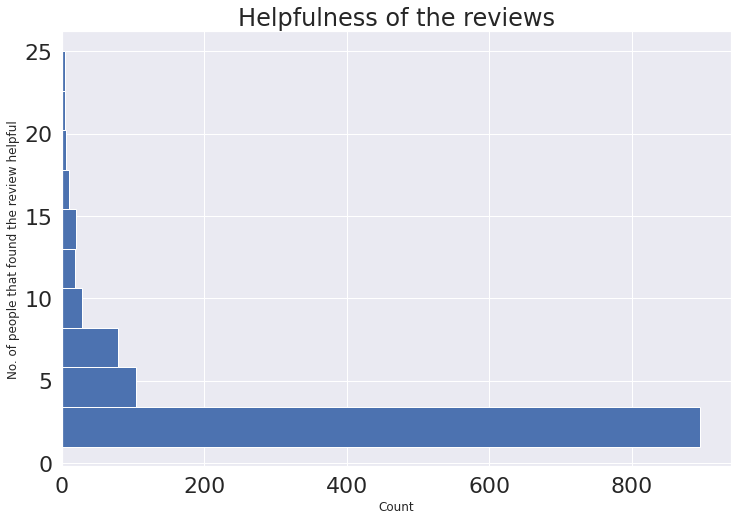

In [27]:
plt.figure(figsize=(12,8))
plt.hist(reviews_df['reviews.numHelpful'],range=[1, 25], orientation='horizontal')
plt.title("Helpfulness of the reviews")
plt.xlabel("Count", fontsize=12)
plt.ylabel("No. of people that found the review helpful", fontsize=12)

Correlation measures the strength of the relationship between different variables in the data. When a value of one variable changes, it effects the other variable in a certain way. 

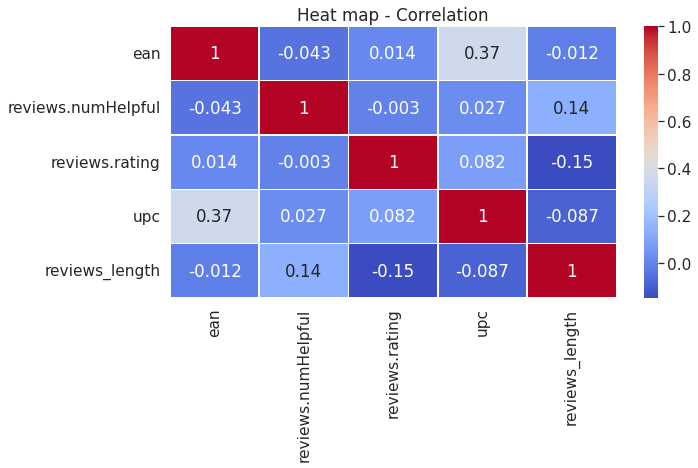

In [28]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
plt.title("Heat map - Correlation")
sns.heatmap(reviews_df.corr(),cmap='coolwarm',annot=True,linewidths=.5)